## Live Sketch Using Webcam

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.4.0 


# Live Sketch 
* Convert image to grayscale
* Clean up image using Guassian Blur
* Extract edges
* Do an invert binarize the image to make it a black sketch on white background

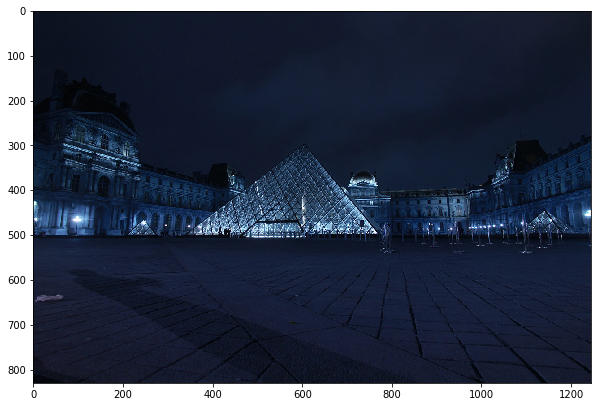

In [7]:
image = cv2.imread('Mastering_Computer_Vision_V1.01\images\input.jpg')
plt.figure(figsize=(10, 7))
plt.imshow(image)
plt.show()

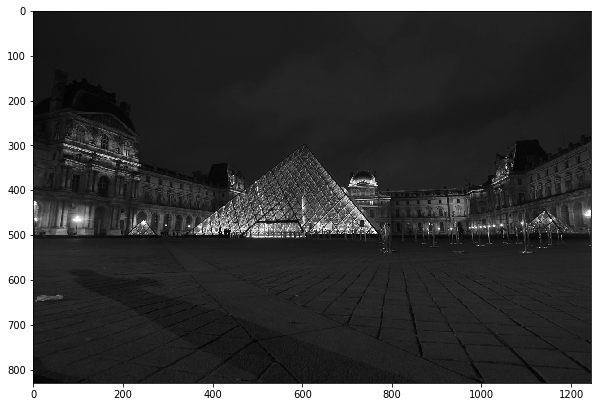

In [8]:
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,7))
plt.imshow(img_gray, cmap= 'gray')
plt.show()


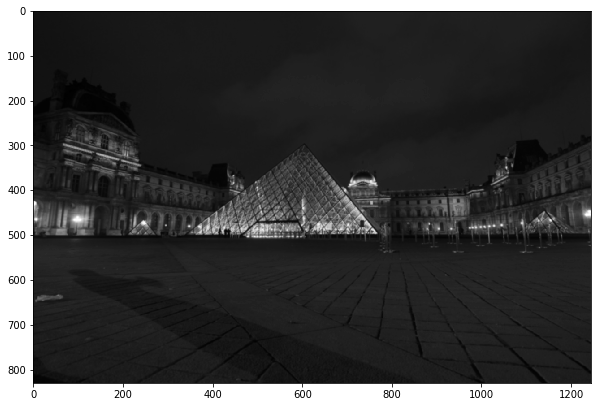

In [9]:
img_gray_blur = cv2.GaussianBlur(img_gray, (5,5), 0)
plt.figure(figsize=(10, 7))
plt.imshow(img_gray_blur, cmap='gray')
plt.show()

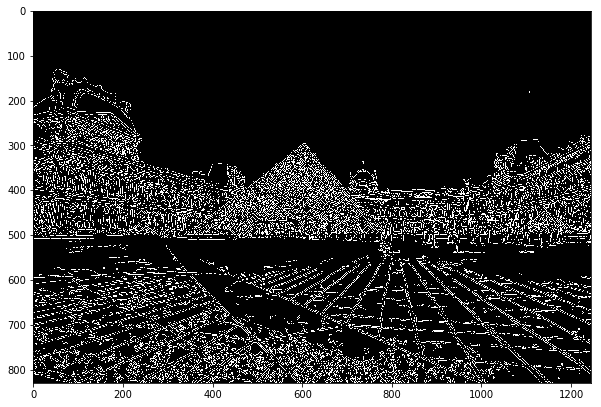

In [10]:
canny_edges = cv2.Canny(img_gray_blur, 5, 20)
plt.figure(figsize=(10, 7))
plt.imshow(canny_edges, cmap= 'gray')
plt.show()

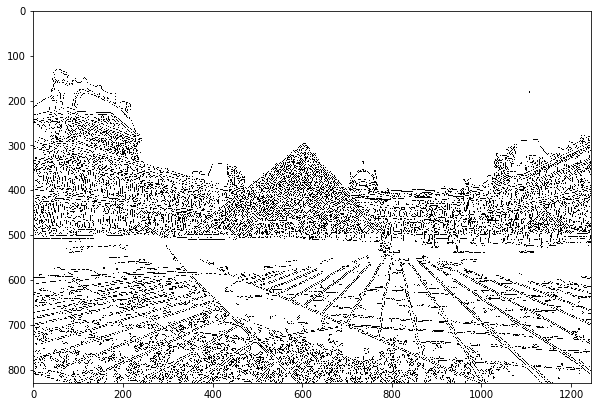

In [11]:
ret, mask = cv2.threshold(canny_edges, 70, 255, cv2.THRESH_BINARY_INV)
plt.figure(figsize=(10, 7))
plt.imshow(mask, cmap='gray')
plt.show()

In [12]:
def sketch(image):
    # Convert image to grayscale
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Clean up image using Guassian Blur
    img_gray_blur = cv2.GaussianBlur(img_gray, (5,5), 0)
    
    # Extract edges
    canny_edges = cv2.Canny(img_gray_blur, 5, 20)
    
    # Do an invert binarize the image 
    ret, mask = cv2.threshold(canny_edges, 70, 255, cv2.THRESH_BINARY_INV)
    return mask

# Live Sketch App

In [13]:
cap = cv2.VideoCapture(0) #24-60 frames per second 

while True:
    ret, frame = cap.read()
    cv2.imshow('Live Sketcher', sketch(frame))
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
# Release camera and close windows
cap.release()
cv2.destroyAllWindows()  